<a href="https://colab.research.google.com/github/tinkercademy/ml-notebooks/blob/main/Data Science (Answers)/03_Intro_to_NumPy_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NumPy

You are becoming proficient with **pandas**, having totally crushed the previous notebook. **pandas** is built on top of **NumPy**, and you might occasionally want to drop down to using NumPy every once in a while. At the very least, you want to explore NumPy to better understand how pandas work.

In [1]:
import numpy as np # because we don't want to type 'numpy', only 'np'. Think of all the hours of typing saved!

## What is NumPy

While Python has lists, it is slow on the kind of list operations we want to perform when we work with large amount of data. **NumPy** was created to address this.

Here are some assumptions that NumPy makes in its implementation so that it can be speedy:
* It understands that when analyzing data, you'll often want to carry out operations over entire collections of values.
* A NumPy array can easily support N-dimensional data, but the length of each dimension is the same (so you can have a 7 x 3 x 8 x 4 array, but not one where in the second dimension, the first element has 3 sub-elements, and the second element has 5 sub-elements)
* To be fast, a NumPy array adds the constraint that the values in each dimension of array can only be of a single data type (homogenous).


### A BMI problem

You are given the weights and heights of an entire class of people, and you need to calculate the BMI.

This is how you would do it using generic Python lists


In [2]:
weight = [73.5, 53.3, 65.4, 59.9]
height = [1.6, 1.68, 1.71, 1.58]

bmi = []
for i in range(len(weight)):
  bmi.append(weight[i] / (height[i] * height[i]))

print(bmi)

[28.710937499999993, 18.884637188208618, 22.365856160870017, 23.994552155103346]


You wish you can calculate the BMI across all the datapoints at one go instead. You can with NumPy.

In [3]:
weight_np = np.array(weight)
height_np = np.array(height)

bmi = weight_np / (height_np * height_np)
print(bmi)

[28.7109375  18.88463719 22.36585616 23.99455216]



The NumPy version is faster than the list, and it becomes obvious with bigger datasets.

You can access individual elements of the NumPy array `ndarray` just like a list using the indexing operator (square brackets). Slicing `ndarray` is also supported



In [4]:
# Get the first element
print(bmi[0])

# Get the last 2 elements
print(bmi[2:])

28.710937499999993
[22.36585616 23.99455216]


In addition, `ndarray` also supports list subsetting using an array of booleans. You have used it with pandas (and this is a feature not supported in generic lists)

In [5]:
# Return an array of booleans
print(bmi > 23)

# Return a subset of elements at the positions where the array of booleans if True
print(bmi[bmi > 23])

[ True False False  True]
[28.7109375  23.99455216]


<hr>

### <font color="red">Exercise 1: P/E Ratio Calculation</font>

The price-to-earnings ratio (P/E ratio) is the ratio for valuing a company that measures its current share price relative to its per-share earnings (EPS). The P/E ratio is a signal to stock traders on the fair value of a stock.

Use **NumPy** to calculate the P/E ratio of a bunch of stocks.

```
stocks = ['ABC', 'NBC', 'GOOG', 'FB', 'SIA']
prices = [56.7, 3.1, 18.4, 9.9, 103.5]
eps = [1.5, 0.04, 0.9, 0.5, 1.4]
```

In [6]:
stocks = ['ABC', 'NBC', 'GOOG', 'FB', 'SIA']
prices = [56.7, 3.1, 18.4, 9.9, 103.5]
eps = [1.5, 0.08, 0.9, 0.5, 4.4]

stocks = np.array(stocks)
prices = np.array(prices)
eps = np.array(eps)

prices/eps

array([37.8       , 38.75      , 20.44444444, 19.8       , 23.52272727])

Find the undervalued stocks. These are stocks with a P/E ratio of less than 21.

In [7]:
stocks[prices/eps < 21]

array(['GOOG', 'FB'], dtype='<U4')

Your answer should be GOOG and FB

<hr>

# 2D NumPy Arrays

Let's break out of 1-D and work in higher dimensions. We keep it simple with a 2-D array first.

Here's one way to create a 2-D NumPy array:

In [8]:
np_2d = np.array([[3.5, 6.4, 12.6, 9.7],
                  [6.1, 8.1, 10.3, 14.2]])

In [9]:
np_2d.shape

(2, 4)

The `shape` attribute will return the shape of the `ndarray`.

The `arange` function is similar to the `range` function. We use it to create a larger array to manipulate.

In [10]:
np_2d = np.arange(50)
np_2d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

We can re-shape an array using the `reshape` function




In [11]:
np_2d = np_2d.reshape(5, 10)
np_2d

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Higher-dimensional arrays also respond to arithmetical operations on the entire list. Here are some examples:

In [12]:
np_2d * 2

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28, 30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48, 50, 52, 54, 56, 58],
       [60, 62, 64, 66, 68, 70, 72, 74, 76, 78],
       [80, 82, 84, 86, 88, 90, 92, 94, 96, 98]])

In [13]:
np_2d + 12

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
       [52, 53, 54, 55, 56, 57, 58, 59, 60, 61]])

In [14]:
np_2d / 2

array([[ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5],
       [ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5],
       [10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5],
       [15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5],
       [20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5]])

## Subsetting Data

You can retrieve individual elements of an n-dimensional `ndarray` like so:

In [15]:
print(np_2d[4][3])
print(np_2d[4,3])

43
43


You can also do fancier subsetting like so:

In [16]:
np_2d[:2, 4:9]

array([[ 4,  5,  6,  7,  8],
       [14, 15, 16, 17, 18]])

# Calculating the value of Pi

We can calculate the value of Pi numerically using the Monte Carlo method. This is how it works. Drop points randomly onto a square of 1 x 1 dimensions. The ratio of points falling within one quadrant is pi / 4.



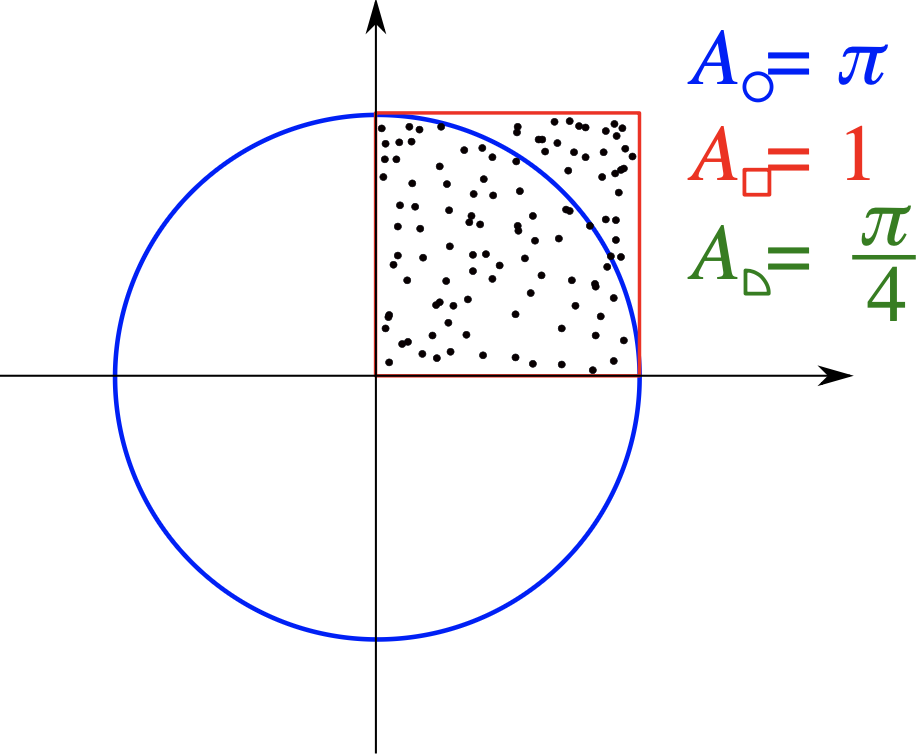

A plain Python implementation is like so:

```
from random import random

number_of_samples = 100000
within_circle_count = 0

for _ in range(number_of_samples):
  x = random()
  y = random()

  if x ** 2 + y ** 2 < 1:
    within_circle_count += 1

print(within_circle_count / number_of_samples * 4)
```

### <font color="red">Exercise 2: Finding the value of pi</font>
Try reimplementing the Monte Carlo pi-finding program using NumPy:

You'll need to use the `np.random.random()` funcction that takes in 1 argument, the number of random numbers between 0 and 1 that you want to create, like so:
`np.random.random(10)`

Another useful function is `np.count_nonzero()` for counting the number of `True` values in an array.

In [22]:
number_of_samples = 100000

within_circle_count = np.count_nonzero(np.random.random(number_of_samples) ** 2 + np.random.random(number_of_samples) ** 2 < 1)

print(within_circle_count / number_of_samples * 4)

3.14824


In [24]:
samples = 50_000
within = np.count_nonzero(np.random.random(samples) ** 2 + np.random.random(samples) ** 2 < 1)
print(within / samples * 4)

3.13144
